# Task 4 To Explore Decision Tree Algorithm

# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [2]:
data=pd.read_csv('C:/Users/jacob/OneDrive/Desktop/STORE/TSF/iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Understanding the structure

In [11]:
data=data.drop(columns=['Id'])
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
data.shape

(150, 5)

# Checking for null values and number of unique values

In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

# Visualizing the distribution of features using Distplot

In [7]:
def dist_plot(feature):
    plt.figure(figsize=(7,5))
    sns.distplot(data[feature])
    plt.axvline(data[feature].mean(),color='green')

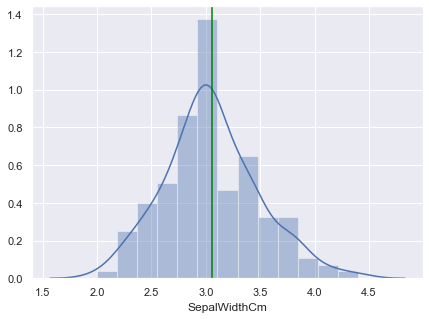

In [8]:
dist_plot('SepalWidthCm')

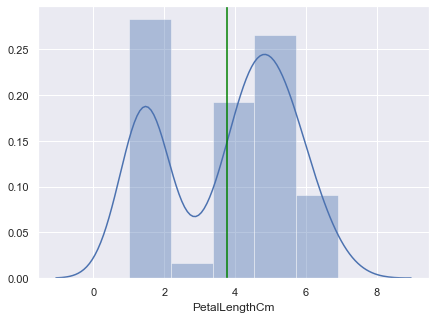

In [9]:
dist_plot('PetalLengthCm')

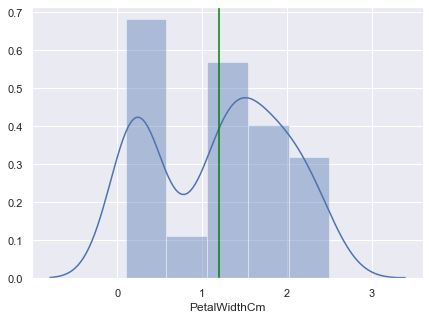

In [10]:
dist_plot('PetalWidthCm')

# Distribution of every category in Species

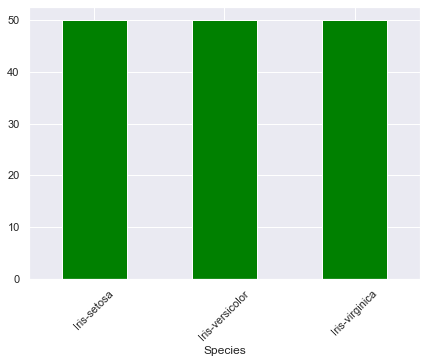

In [39]:
plt.figure(figsize=(7,5))
ax=data.groupby(['Species']).size().plot(kind='bar',color='green')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
)
plt.show()

# Checking for outliers

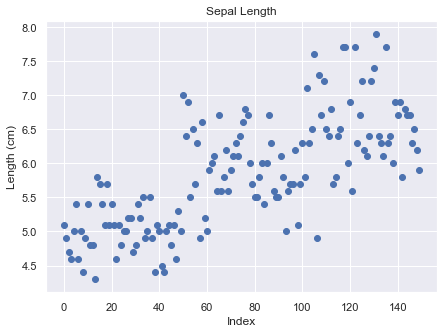

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(data.index,data['SepalLengthCm'])
plt.xlabel('Index')
plt.ylabel('Length (cm)')
plt.title('Sepal Length')
plt.show()

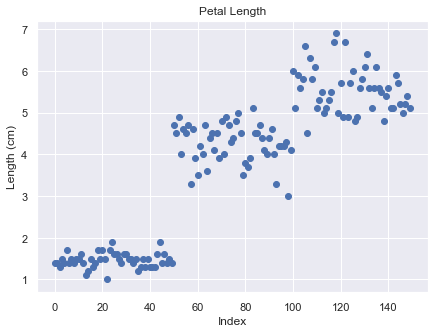

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(data.index,data['PetalLengthCm'])
plt.xlabel('Index')
plt.ylabel('Length (cm)')
plt.title('Petal Length')
plt.show()

# Bivariate Analysis

# Checking Correlation using Heatmap

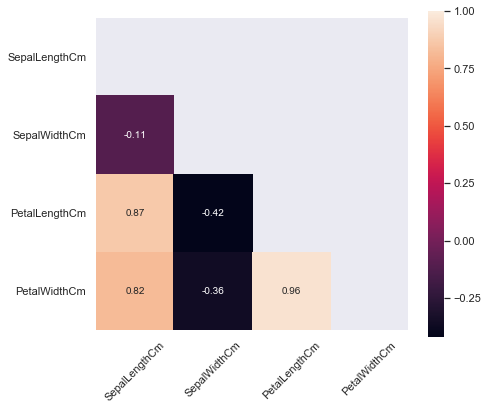

In [14]:
corr=data.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(7,6))
ax=sns.heatmap(corr,mask=mask,square=True,annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
)
ax.set_ylim([4,0])
plt.show()

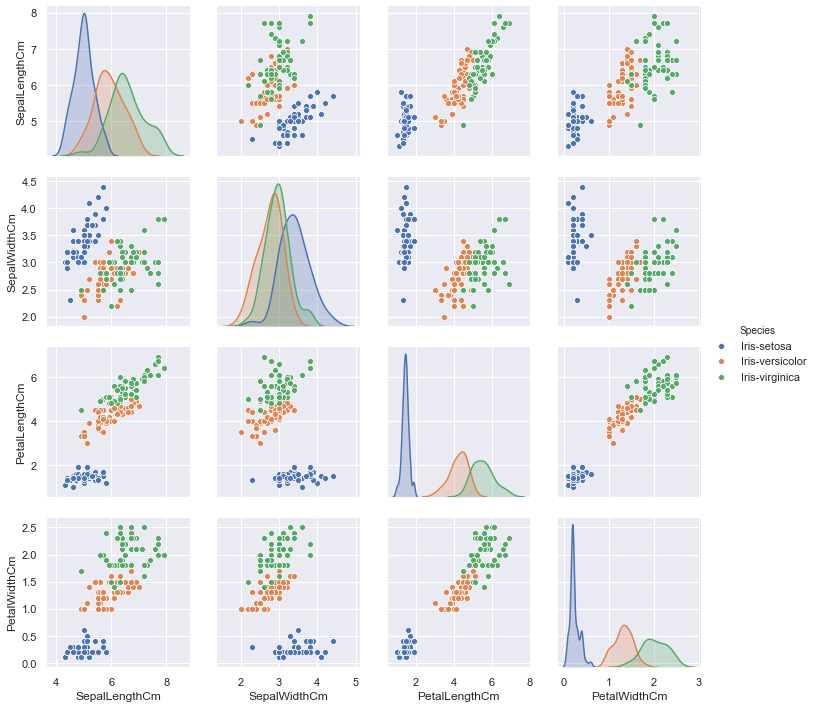

In [15]:
sns.pairplot(data,hue='Species')
plt.show()

# Initializing x and y

In [12]:
# Dropping PetalLengthCm Feature due to high correlation with 2 other features
x=data.drop(columns=['Species','PetalLengthCm']).values
y=data.loc[:,'Species']
from sklearn.utils import shuffle
x,y=shuffle(x,y)

# Encoding y to numerical values

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc_x=MinMaxScaler(feature_range=(0,1))
x=sc_x.fit_transform(x)

# Importing and fitting Decision Tree Classifier

In [15]:
# Setting max_depth to 3 to avoid overfitting
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Decision Tree Plot

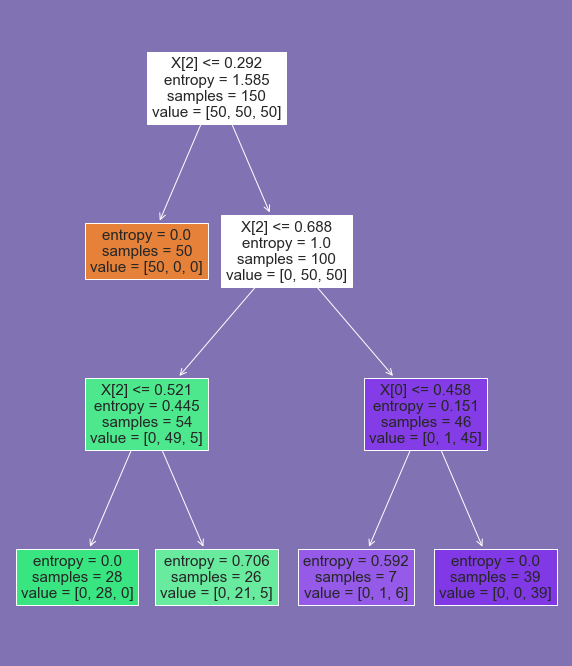

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,12),facecolor='m')
plot_tree(decision_tree=classifier,filled=True)
plt.show()

# Checking Accuracy

Accuracy: 96.0%


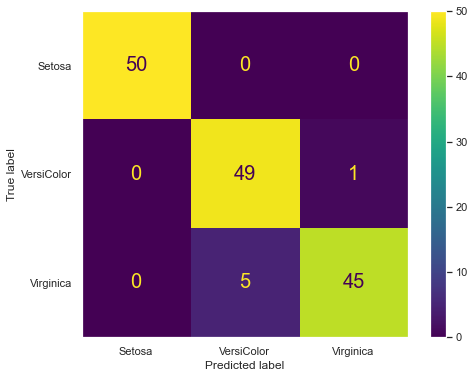

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_pred=classifier.predict(x)
cm=confusion_matrix(y,y_pred)
acc=np.round(accuracy_score(y,y_pred)*100,2)
fig,ax=plt.subplots(figsize=(8,6))
ax.grid(False)
plt.rc('font',size=20)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Setosa','VersiColor','Virginica']).plot(ax=ax)
print('Accuracy: {}%'.format(acc))